In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#pip install pandas_datareader 

In [3]:
from pandas_datareader import data as web
import datetime as dt

In [4]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

df = web.get_data_yahoo('AAPL', start, end)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.330002
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.289993
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.380005
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,178.199997
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.570007


In [6]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


- here my web application is based on close column but we can olso use other columns too.

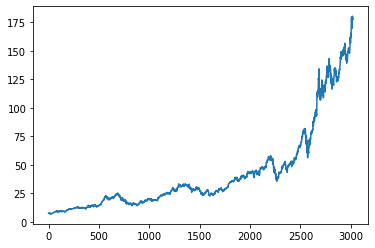

In [8]:
plt.plot(df.Close)

In [9]:
ma100=df.Close.rolling(100).mean()

In [10]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

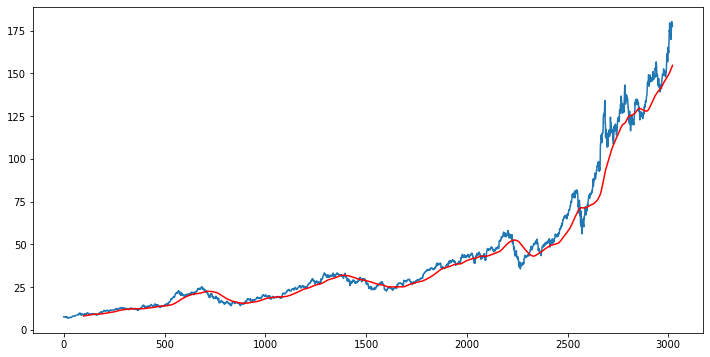

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
#500movingaverage=ma500

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

In [13]:
df.shape

(3022, 5)

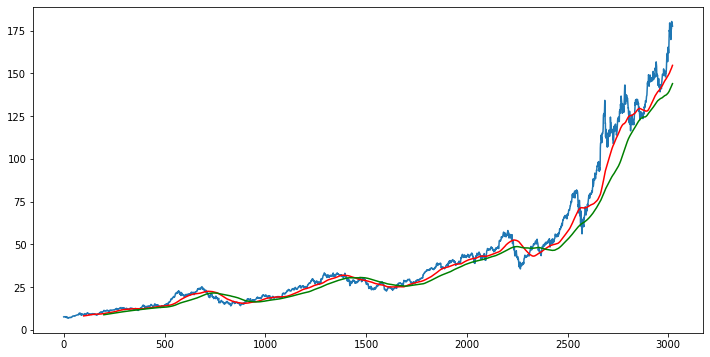

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(3022, 5)

In [16]:
# splitting data into train and test models
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [17]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [18]:
data_train.shape

(2115, 1)

In [19]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [20]:
data_test.shape

(907, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_array=scaler.fit_transform(data_train)
data_train_array             #here we've converted into an array so,following o/p 'll give in an array form

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [23]:
data_train_array.shape

(2115, 1)

A/q ,to shape of my training data $data_tarain_array$: 
- """ i had split my data into $x_$$train$ and $y_$$train$ for that i have used Time series Analysis analogy., that value for a particular day or closing price on a particular day will dependent on a previous days.For the previous days value i have defined "STEP as 100" which means $value$ $for$ $101$ $days$ $will$ $be$ $dependent$ $on$ $the$ $previous$ $100$ $days$."""
    -Therefore ,
            - x_train=100 days,
            - y_train=101 days.

In [24]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

- ML MODEL

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , LSTM

In [26]:
model=tf.keras.Sequential()

model.add(LSTM(units=50, activation='relu',return_sequences=True,
             input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))



#"""to connect all the layers"""        


model.add(Dense(units = 1))

In [27]:
tf.__version__

'2.7.0'

In [28]:
keras.__version__

'2.7.0'

In [29]:
model.summary()     #summay of LSTM model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 20s 201ms/step - loss: 0.0444
Epoch 2/50
63/63 [==============================] - 13s 200ms/step - loss: 0.0087
Epoch 3/50
63/63 [==============================] - 13s 200ms/step - loss: 0.0081
Epoch 4/50
63/63 [==============================] - 12s 194ms/step - loss: 0.00721s - lo
Epoch 5/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0064
Epoch 6/50
63/63 [==============================] - 12s 192ms/step - loss: 0.0066
Epoch 7/50
63/63 [==============================] - 12s 192ms/step - loss: 0.0064
Epoch 8/50
63/63 [==============================] - 12s 192ms/step - loss: 0.0058
Epoch 9/50
63/63 [==============================] - 12s 194ms/step - loss: 0.0054
Epoch 10/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0058
Epoch 11/50
63/63 [==============================] - 12s 198ms/step - loss: 0.0047
Epoch 12/50
63/63 [==============================] - 12s 195ms/step - loss: 0.0043
Epoch 

- use this trained model for streamlit

In [31]:
model.save('keras_model.h5')

In [32]:
data_test.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [33]:
past_100_days=data_train.tail(100)

In [34]:
final_df=past_100_days.append(data_test, ignore_index=True)
final_df

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500
...,...
1002,180.330002
1003,179.289993
1004,179.380005
1005,178.199997


In [35]:
inp_data=scaler.fit_transform(final_df)
inp_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [36]:
inp_data.shape

(1007, 1)

In [37]:
x_test=[]
y_test=[]
for i in range(100,inp_data.shape[0]):
    x_test.append(inp_data[i-100: i])
    y_test.append(inp_data[i, 0])

In [38]:
x_test, y_test=np.array(x_test),np.array(y_test)
x_test.shape

(907, 100, 1)

In [39]:
y_test.shape

(907,)

In [40]:
#making predictions


y_predicted= model.predict(x_test)
y_predicted.shape

(907, 1)

In [41]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [42]:
y_predicted

array([[0.14452438],
       [0.14526975],
       [0.14589475],
       [0.14640743],
       [0.14683191],
       [0.14720744],
       [0.14757599],
       [0.14797452],
       [0.14842427],
       [0.14892235],
       [0.14945023],
       [0.14999044],
       [0.15052006],
       [0.15101542],
       [0.15145038],
       [0.15180236],
       [0.15204327],
       [0.15215427],
       [0.1521301 ],
       [0.15197366],
       [0.15168494],
       [0.1512808 ],
       [0.15078801],
       [0.15024143],
       [0.14967461],
       [0.14912614],
       [0.14861219],
       [0.14814079],
       [0.14773016],
       [0.1474119 ],
       [0.14721182],
       [0.14712885],
       [0.14716049],
       [0.14730668],
       [0.14755586],
       [0.14789215],
       [0.14829226],
       [0.14873582],
       [0.149205  ],
       [0.14968222],
       [0.15015963],
       [0.15064314],
       [0.15113747],
       [0.15162554],
       [0.1520783 ],
       [0.15247223],
       [0.15285048],
       [0.153

In [43]:
scaler.scale_

array([0.00690691])

In [44]:
scale_fact=1/0.00690691
y_predicted=y_predicted*scale_fact
y_test=y_test*scale_fact

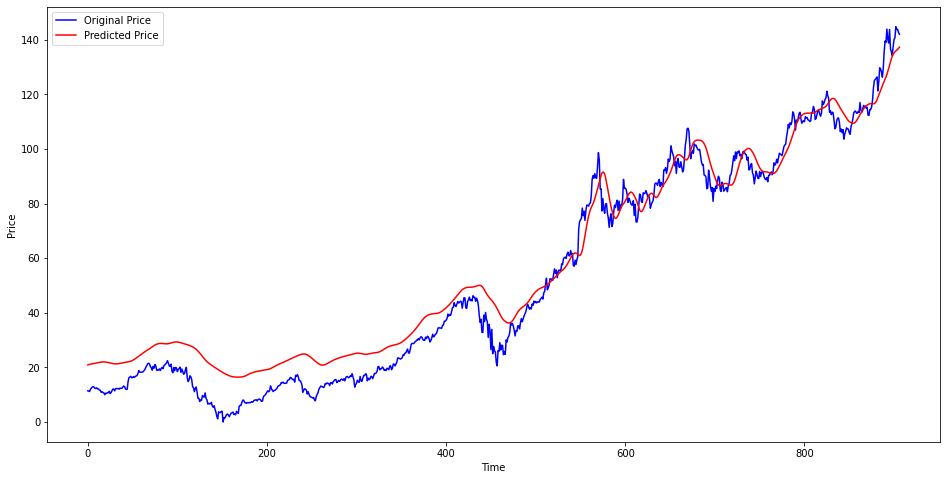

In [45]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'b' , label='Original Price')
plt.plot(y_predicted, 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()